In [8]:
import pandas as pd


columns_to_keep = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population',
                   'people_fully_vaccinated', 'median_age', 'aged_65_older', 'cardiovasc_death_rate', 'diabetes_prevalence']

dataframe = pd.read_csv('data/owid_covid_data_top_10.csv',
                        sep=',', encoding='utf8', usecols=columns_to_keep)

dataframe['year_month'] = dataframe['date'].str[:7]

aggregation = dataframe.groupby(['location', 'year_month'], as_index=False).agg(
    total_cases=('total_cases', 'max'),
    new_cases=('new_cases', 'sum'),
    total_deaths=('total_deaths', 'max'),
    new_deaths=('new_deaths', 'sum'),
    population=('population', 'mean'),
    people_fully_vaccinated=('people_fully_vaccinated', 'max'),
    median_age=('median_age', 'mean'),
    aged_65_older=('aged_65_older', 'mean'),
    cardiovasc_death_rate=('cardiovasc_death_rate', 'mean'),
    diabetes_prevalence=('diabetes_prevalence', 'mean')
)

aggregation.head()

,location,year_month,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,NaN,0.0,213993441.0,NaN,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,213993441.0,NaN,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,213993441.0,NaN,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,213993441.0,NaN,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,213993441.0,NaN,33.5,8.552,177.961,8.11


In [9]:
aggregation.fillna(0, inplace=True)
aggregation.head()

,location,year_month,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,0.0,0.0,213993441.0,0.0,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,213993441.0,0.0,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,213993441.0,0.0,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,213993441.0,0.0,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,213993441.0,0.0,33.5,8.552,177.961,8.11


In [10]:
brazil_aggregation = aggregation[aggregation['location'] == 'Brazil']
brazil_aggregation.reset_index(inplace=True, drop=True)
brazil_aggregation.head()

,location,year_month,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,0.0,0.0,213993441.0,0.0,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,213993441.0,0.0,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,213993441.0,0.0,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,213993441.0,0.0,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,213993441.0,0.0,33.5,8.552,177.961,8.11


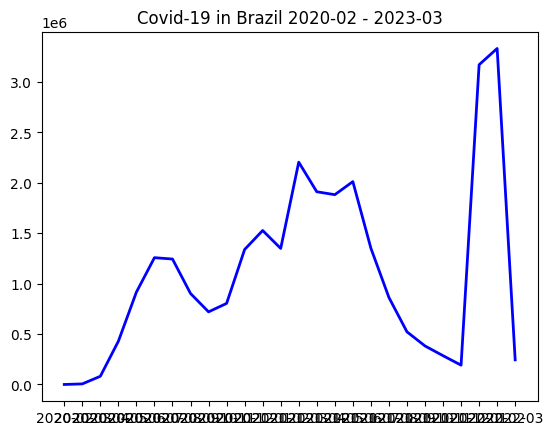

In [11]:
import matplotlib.pyplot as plt


brazil_x = brazil_aggregation['year_month']
brazil_y = brazil_aggregation['new_cases']

plt.title('Covid-19 in Brazil 2020-02 - 2023-03')
plt.plot(brazil_x, brazil_y, 'b-', linewidth=2)
plt.show()

In [12]:
brazil_aggregation[['year_month', 'new_cases']]

,year_month,new_cases
0,2020-02,2.0
1,2020-03,5715.0
2,2020-04,81470.0
3,2020-05,428950.0
4,2020-06,916328.0
5,2020-07,1257782.0
6,2020-08,1244378.0
7,2020-09,902536.0
8,2020-10,720398.0
9,2020-11,804202.0


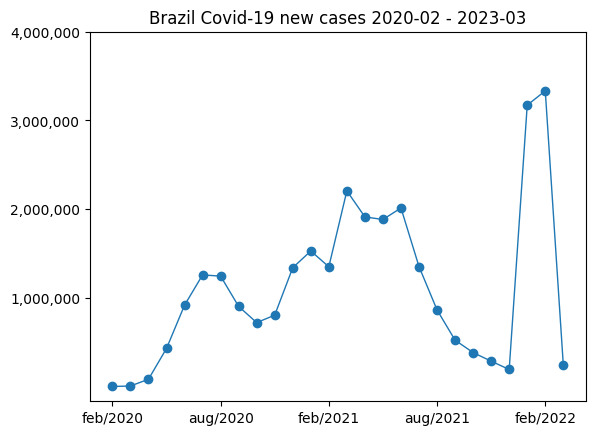

In [13]:
import matplotlib.pyplot as plt


x_ticks = [0, 6, 12, 18, 24]
x_labels = ['feb/2020', 'aug/2020', 'feb/2021', 'aug/2021', 'feb/2022']
y_ticks = [i * 10 ** 6 for i in range(1, 5)]
y_labels = [f'{i},000,000' for i in range(1, 5)]

plt.plot(brazil_x, brazil_y, linewidth=1, marker='o')
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.title('Brazil Covid-19 new cases 2020-02 - 2023-03')
plt.show()

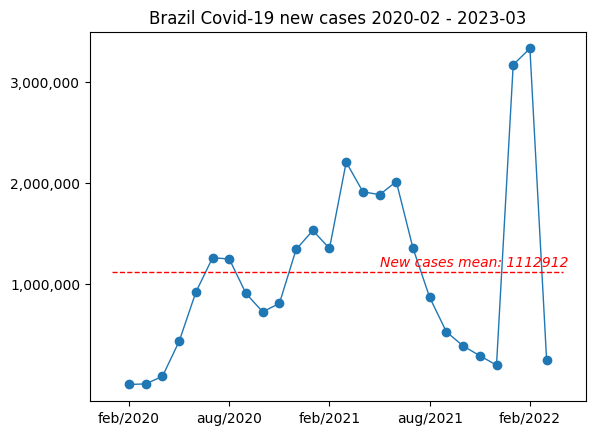

In [14]:
figure, axes = plt.subplots()

axes.plot(brazil_x, brazil_y, linewidth=1, marker='o')
axes.set_xticks(x_ticks)
axes.set_xticklabels(x_labels)
axes.set_yticks(y_ticks)
axes.set_yticklabels(y_labels)

# reference line
axes.plot([-1, 26], [brazil_y.mean(), brazil_y.mean()], 'r--', linewidth=1)
axes.text(15, brazil_y.mean() + (brazil_y.mean() * 0.05), f'New cases mean: {brazil_y.mean():.0f}', color='r', style='italic')

plt.title('Brazil Covid-19 new cases 2020-02 - 2023-03')
plt.show()